In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_parquet("../data/financial_news_2020_2025.parquet", engine="pyarrow")

In [3]:
summary = pd.DataFrame({
    "column":     df.columns,
    "dtype":      df.dtypes.astype(str),
    "missing":    df.isna().sum(),
    "pct_missing": (df.isna().mean() * 100).round(2)
})
print(summary)


                          column   dtype  missing  pct_missing
date                        date  object        0         0.00
title                      title  object        0         0.00
content                  content  object        0         0.00
symbols                  symbols  object        0         0.00
tags                        tags  object        0         0.00
tag_source            tag_source  object        0         0.00
sentiment_label  sentiment_label  object        0         0.00
sentiment              sentiment  object        4         0.02
token_count          token_count   int64        0         0.00


<Axes: title={'center': 'Articles per Year'}, xlabel='date'>

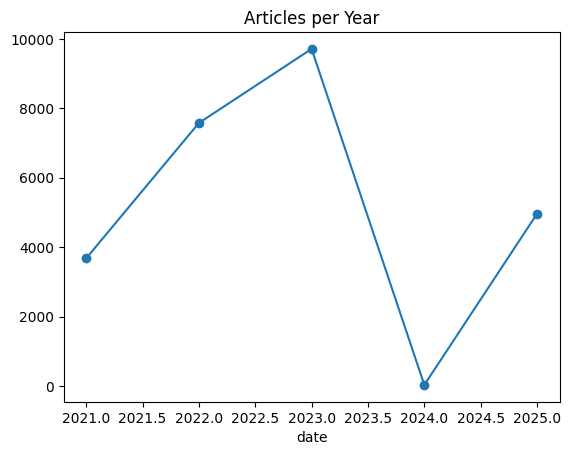

In [4]:
df["date"] = pd.to_datetime(df["date"])
df.groupby(df["date"].dt.year).size().plot(kind="line", marker="o", title="Articles per Year")


Text(0.5, 1.0, 'Token Count Distribution')

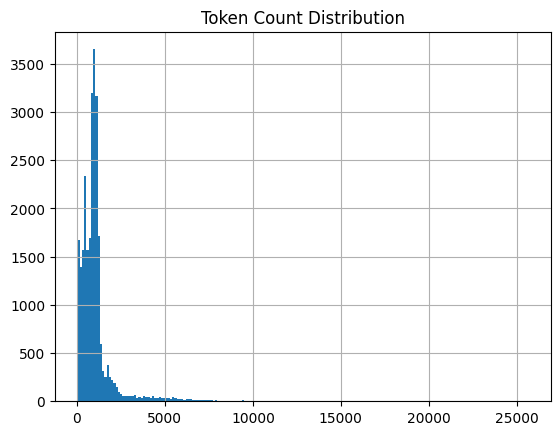

In [5]:
df["token_count"].hist(bins=200)
plt.title("Token Count Distribution")


<Axes: title={'center': 'Sentiment Labels'}, xlabel='sentiment_label'>

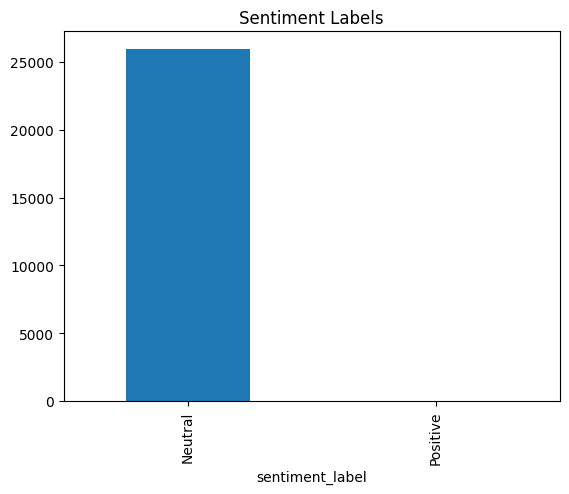

In [6]:
df["sentiment_label"].value_counts().plot(kind="bar", title="Sentiment Labels")


<Axes: title={'center': 'Top 20 Symbols'}, xlabel='symbols'>

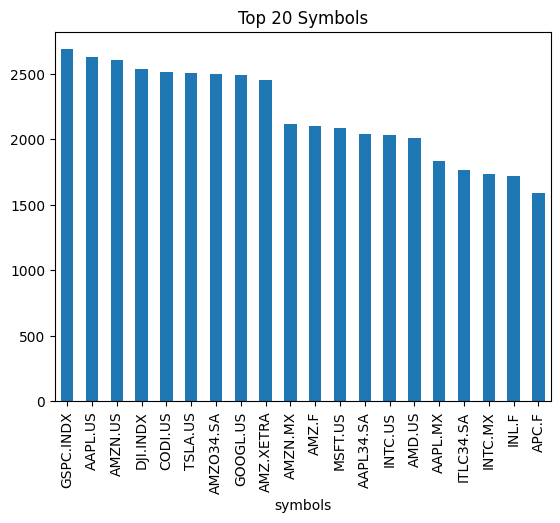

In [7]:
# Tags
tags = df["tags"].explode()
tags.value_counts().head(20).plot(kind="bar", title="Top 20 Tags")
# Symbols
syms = df["symbols"].explode()
syms.value_counts().head(20).plot(kind="bar", title="Top 20 Symbols")


Text(0.5, 1.0, 'Article Character Count')

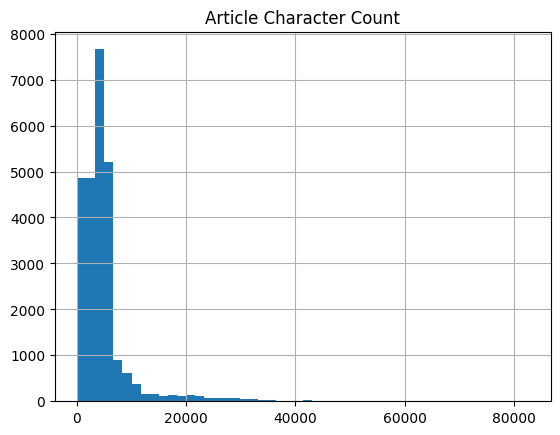

: 

In [ ]:
df["char_count"] = df["content"].str.len()
df["char_count"].hist(bins=50)
plt.title("Article Character Count")
